In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Github_Data_2020_ready_for_text_analysis.csv')

In [6]:
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license,lang,clean
0,2,311525798,MDEwOlJlcG9zaXRvcnkzMTE1MjU3OTg=,Web-Dev-For-Beginners,microsoft/Web-Dev-For-Beginners,False,https://github.com/microsoft/Web-Dev-For-Begin...,"24 Lessons, 12 Weeks, Get Started as a Web Dev...",False,https://api.github.com/repos/microsoft/Web-Dev...,...,Organization,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NaN,en,24 lessons 12 weeks get started web developer
1,3,264323169,MDEwOlJlcG9zaXRvcnkyNjQzMjMxNjk=,graduation,education/graduation,False,https://github.com/education/graduation,$ git remote <graduation> yearbook,False,https://api.github.com/repos/education/graduation,...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN,en,git remote graduation yearbook
2,5,361198003,MDEwOlJlcG9zaXRvcnkzNjExOTgwMDM=,rdp,c9ffin/rdp,False,https://github.com/c9ffin/rdp,You can get unlimited rdp for free.,False,https://api.github.com/repos/c9ffin/rdp,...,User,False,NaN,NaN,NaN,NaN,NaN,NaN,en,get unlimited rdp free
3,6,234170528,MDEwOlJlcG9zaXRvcnkyMzQxNzA1Mjg=,React-Components-Insta-Clone,LambdaSchool/React-Components-Insta-Clone,False,https://github.com/LambdaSchool/React-Componen...,Module Project for Composing React Components ...,False,https://api.github.com/repos/LambdaSchool/Reac...,...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN,en,module project composing react components pass...
4,7,243650536,MDEwOlJlcG9zaXRvcnkyNDM2NTA1MzY=,User-Interface-II,LambdaSchool/User-Interface-II,False,https://github.com/LambdaSchool/User-Interface-II,Flexbox Challenge,False,https://api.github.com/repos/LambdaSchool/User...,...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN,en,flexbox challenge


# Numerical Data

In [7]:
df[['watchers_count', 'size', 'forks_count', 'open_issues']].describe()

,watchers_count,size,forks_count,open_issues
count,356.000000,3.560000e+02,356.000000,356.000000
mean,765.786517,7.635213e+04,285.747191,32.766854
std,2283.421975,4.208247e+05,345.358451,69.142874
min,0.000000,0.000000e+00,95.000000,0.000000
25%,2.000000,2.127500e+02,143.750000,0.000000
50%,27.000000,1.502000e+03,166.000000,5.000000
75%,484.750000,1.503700e+04,317.750000,32.500000
max,25031.000000,5.058376e+06,3553.000000,519.000000


# Top technologies

In [9]:
# Identifying the most popular phrases related to technologies by 
# focusing on most frequent bigrams

import nltk         
from nltk.collocations import *      #implements n-gram search tools

In [13]:
list_documents = df['clean'].apply(lambda x : x.split()).tolist()
# here list_documents is a list of lists containing words in the column 'clean'

In [14]:
# finding bigrams document-wise and avoiding corpus wise by using from_documents

bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_documents)

In [20]:
bigram_finder.apply_freq_filter(3)  #considering bigrams with at least three occurences

In [22]:
bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
# we get top 20 bigrams according to raw_freq measure

In [23]:
# now we find scores of these bigrams i.e. (here) the frequency corresponding to each

scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [24]:
ngram = list(bigram_finder.ngram_fd.items())   # bigram_finder.ngram_fd is a dictionary

In [30]:
ngram.sort(key = lambda item: item[-1], reverse = True)

In [68]:
ngram[:10]

[(('open', 'source'), 22),
 (('hacktoberfest', '2020'), 7),
 (('pfm', 'c'), 6),
 (('c', 'musicians'), 6),
 (('starter', 'project'), 5),
 (('let', 's'), 5),
 (('contributing', 'open'), 5),
 (('data', 'structures'), 4),
 (('second', 'task'), 4),
 (('example', 'repo'), 4)]

In [35]:
frequency = [(' '.join(k), v) for k, v in ngram]

# this just joins the tuple containing bigrams

In [58]:
df = pd.DataFrame(frequency)

In [59]:
df.head()

,0,1
0,open source,22
1,hacktoberfest 2020,7
2,pfm c,6
3,c musicians,6
4,starter project,5


In [60]:
import matplotlib.pyplot as plt

In [61]:
plt.style.use('ggplot')

In [62]:
df.set_index([0], inplace = True)
df.head()

,1
0,
open source,22
hacktoberfest 2020,7
pfm c,6
c musicians,6
starter project,5


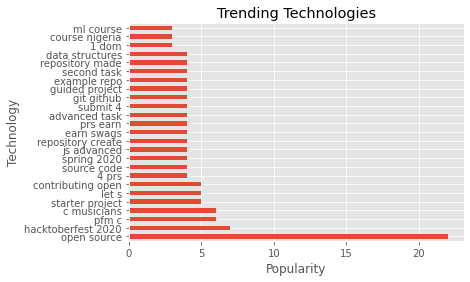

In [67]:
df.sort_values(by = [1], ascending = False).head(25).plot(kind = 'barh')
plt.title('Trending Technologies')
plt.ylabel('Technology')
plt.xlabel('Popularity')
plt.legend().set_visible(False)
plt.show()